# Test a Perceptual Phenomenon


Craig Nicholson  
September 2, 2015
* * *

In this project, you will investigate a classic phenomenon from experimental psychology called the Stroop Effect. You will learn a little bit about the experiment, create a hypothesis regarding the outcome of the task, then go through the task yourself. You will then look at some data collected from others who have performed the same task and will compute some statistics describing the results. Finally, you will interpret your results in terms of your hypotheses.

## Statistics: The Science of Decisions Project Instructions

### Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a **congruent** words condition, and an **incongruent** words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

### Imports

In [73]:
import pandas as pd
import scipy.stats as stats
import statsmodels as sm
from pandas.tools.plotting import scatter_matrix
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import kruskal
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# display plot within the notebook rather than a new window
%pylab inline

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


### Load the data

In [57]:
# load the stroopdata.csv
path = '~/Downloads/P1/stroopdata.csv'
df = pd.read_csv(path)
# show a 5 records
df.head(n=5)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


Display a variety of summary statistics about the columns of a DataFrame (excluding NAs of course).

In [56]:
# print out some quick stats about the data before we begin
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


### Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.

### 1. What is our independent variable? What is our dependent variable?
The **independant variable** is the color words whose names do not match the colors in which they are printed.  The incongruent words are the independant variable.

OR

The congruent and incongruent list of words are the independant variables.  We have two indenpendant variables for this experiment.


The **dependant variable** is time it takes to say out loud the color of the ink in which the word is printed.

Clarification of dependant variable:  The time it takes (seconds) to say the color of the ink for the color words for the congruent and incongruent list is what is being measured.  

**[Notes]**  
*An independent variable, sometimes called an experimental or predictor variable, is a variable that is being manipulated in an experiment in order to observe the effect on a dependent variable, sometimes called an outcome variable.*
 
*The dependent variable is the variable being measured which is affected by the independent variable*

Reference:
[Laerd Statistics : Types of Variable](https://statistics.laerd.com/statistical-guides/types-of-variable.php)


### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

##### Hypothesis
The null hypothesis, for this experiment would be the time it takes to say the color of the ink in the congruent and incongruent lists takes approximately the same amount of time, on average.

We need to check to see if there is a significant difference in the times to read aloud the color of the ink in the congurent and incongruent lists.

**Types of Statistical Tests **
The types of statistical test one can use depends on the type of data.  The data for the Stroop task is interval and relatively normal.  Our options are the following:

- Two-Sample t-Test for Equal Means
- Whitney test


[idre UCLA - What statistical analysis should I use?](http://www.ats.ucla.edu/stat/mult_pkg/whatstat/)     
[NIST - What are statistical tests?](http://www.itl.nist.gov/div898/handbook/prc/section1/prc13.htm)  
[Two-Sample t-Test for Equal Means](http://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm)  


### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

#### Central Tendency
*Mean, Median, Mode, a histogram of both of the data sets measure the central tendency of a dataset.  The typical or middle value for the dataset.*

The mean for the congruent list is 14.05 with a median of 14.36.  

The mean for the incongruent list is 22.02 with a median of 21.02.

[Laerd Statistics : Measure of Centrral Tendancy ](https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php)

**Congruent Mean & Median **

In [51]:
# Get the mean and median for the Congruent list
c_mean = df['Congruent'].mean()
c_median = df['Congruent'].median()

# print Congruent results
print(c_mean, c_median)
#df['Congruent'].mode() - no mode exists - need more a

(14.051125000000004, 14.3565)


**Incongruent Mean & Median**

In [52]:
# Get the mean and median for the Incongruent list
i_mean = df['Incongruent'].mean()
i_median = df['Incongruent'].median()

# print Congruent results
print(i_mean, i_median)
#df['Incongruent'].mode()

(22.01591666666667, 21.0175)


**Histograms for Congruent and Incongruent Lists**  
The histogram can help us visualize the central tendency and the mode for a dataset.  I have set the x axis to start at the same range for both histograms to show how the Incongruent List is right shifted on the x axis.


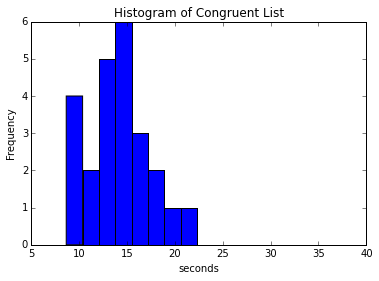

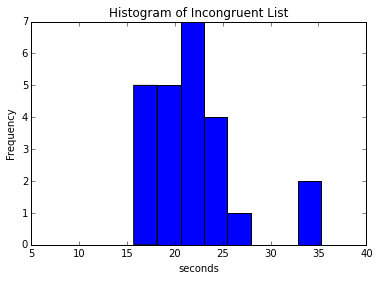

In [13]:
# Histogram of Congruent List
plt.hist(df['Congruent'], bins=8)
plt.title("Histogram of Congruent List")
plt.xlabel("seconds")
plt.ylabel("Frequency")
plt.axis(xmin=5, xmax=40)
# call plt.figure() so we get two distinct histograms
plt.figure()

# Histogram of Incongruent List
plt.hist(df['Incongruent'], bins=8)
plt.title("Histogram of Incongruent List")
plt.xlabel("seconds")
plt.ylabel("Frequency")
plt.axis(xmin=5, xmax=40)
plt.figure()

#### Measure of Variability?

The seconds for the Congruent list are less spread out and more likely normally distributed than the incongruent list whose data is right shifted.   The Incongruent list has a larger mean then the Congruent list.

Typically one can look at the range, quartiles and standard deviation to see the variability of the data.

**Range**
Incongruent list has a larger range than the congruent list.

In [34]:
dfStat = df.describe()
# Range
Congruent_R = dfStat['Congruent']['max'] - dfStat['Congruent']['min']
Incongruent_R = dfStat['Incongruent']['max'] - dfStat['Incongruent']['min']
print('Range of Congruent & Incongruent Lists',Congruent_R, Incongruent_R)

('Range of Congruent & Incongruent Lists', 13.698000000000002, 19.568000000000001)



**Interquartile Range (IQR)**  
IQR = 75% - 25%  

The data for the Incongruent IQR is slightly more spread out than the Congruent data.

In [32]:
# IQR
cIQR = dfStat['Congruent']['75%'] - dfStat['Congruent']['25%']
iIQR = dfStat['Incongruent']['75%'] - dfStat['Incongruent']['25%']
print('IQR of Congruent & Incongruent Lists',cIQR,iIQR)

('IQR of Congruent & Incongruent Lists', 4.3054999999999986, 5.3347499999999997)


**Standard Deviation of the Congruent and Incongruent Lists**  
The Incongruent List has a larger standard deviation (1.35x larger than Congruent) so the values in the Incongruent list are spread farther out from the mean.

In [135]:
dfStat.iloc[[2]]

,Congruent,Incongruent
std,3.559358,4.797057


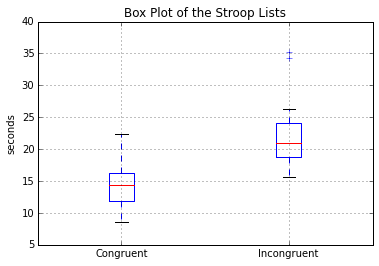

In [50]:
### Slice the data for a nice box plot
x_sec = df[['Congruent', 'Incongruent']]
plt.figure()
bp = x_sec.boxplot()
plt.title('Box Plot of the Stroop Lists')
plt.ylabel("seconds")

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Distribution plots are typically:  
- Histograms 
- Density
- Box

#### Histograms

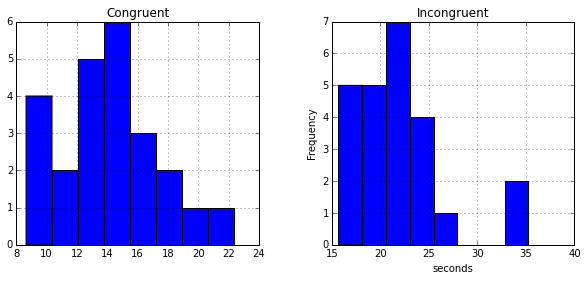

In [95]:
# Quick print of simple histograms
df.hist(bins=8,figsize=(10, 4))

The Congruent dataset is more likely normal than the incongruent dataset which seems to be skewed to the left, which is postively skewed.

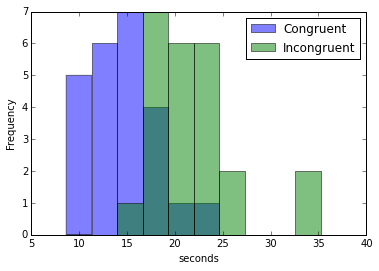

In [97]:
# Let's stack the histograms
df.plot(kind='hist', alpha=0.5)
plt.xlabel('seconds')
plt.ylabel('Frequency')

Stacking demonstrates the overlapping between the two datasets and how each is distrubted comparitively.  We can see over lapping occuring approximately around at 15 to 25 seconds with in a low frequency until we are approximately at 17.5 seconds where the freqeuncy is the highest (when overlapped) for both list at 4.

One can visually see it takes the sample population more time to read the color of the ink of the words for the incongruent list.

#### Density

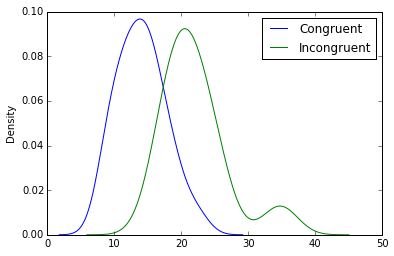

In [136]:
# this uses pyplot - fyi instead of the ggplot2
df.plot(kind='kde')

We can see the Incongruent normalized curve has a bump out to the right, due to the outliers.

> "In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample."

[Wikipedia - Kernal Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)


#### Box Plots

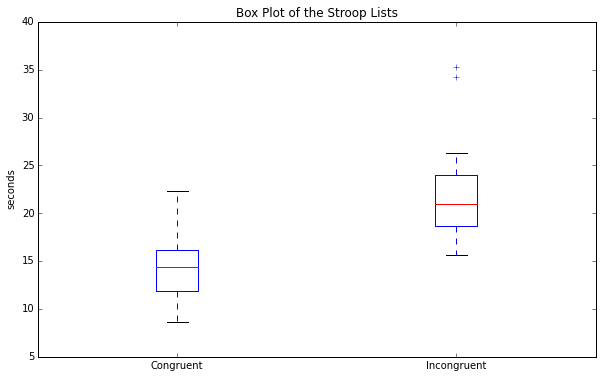

In [133]:
# print out simple box plot
df.plot(kind='box', figsize=(10,6))
plt.title('Box Plot of the Stroop Lists')
plt.ylabel("seconds")

Box plots show us the spread of the data, using the quartiles, median and the min and max points as well as the outliers for the data.  We can see above the Incongruent data has outliers around 35 seconds.

One can visually see it takes the sample population more time to read the color of the ink of the words for the incongruent list with the box plot.  We can even quickly see the medians are much different as well as the ranges for the congruent and incongruent datasets.

The data seems to be leading us to say it takes more time for a subject to say the color of the ink out loud when the color word is different than the color.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

#### T Test

> We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis.

We have 24 samples, so we have 23 degrees of freedom (I think).

t statistic  = (xbar - mean) / (sd / sqrt(24))
 

[scipy.stats.ttest_ind](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

In [108]:
ttest_ind(df['Congruent'], df['Incongruent'])

(-6.5322505539032285, 4.5949489622951854e-08)

The p value < 0.05 we can reject the null hypothesis of equal averages.

In [110]:
# equal_var : bool, optional
# If True (default), perform a standard independent 2 sample test 
# that assumes equal population variances [R368]. 
# If False, perform Welch’s t-test, which does not assume equal population variance
ttest_ind(df['Congruent'], df['Incongruent'],equal_var = False)

(-6.5322505539032285, 6.5101673904426379e-08)

#### Mann-Whitney
Returns:  
statistic : float  
The Mann-Whitney statistics.    
pvalue : float   
One-sided p-value assuming a asymptotic normal distribution.  

[scipy.stats.mannwhitneyu](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)

In [112]:
stats.mannwhitneyu(df['Congruent'], df['Incongruent'], use_continuity=True)

(37.0, 1.2007625250896612e-07)

#### Anova

In [60]:
f_value, p_value = f_oneway(df['Congruent'], df['Incongruent'])
f_value, p_value

(42.670297298968549, 4.5949489622957869e-08)

### 6. What do you think is responsible for the effects observed? 

Our damn brains.  Does it affect subjects with color blindness?

### Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Not yet.   What does the brain see vs what we say?   Maybe dyslexia is a form of this because the brain flips letters and numbers around... 

## References

[Pandas Documentation](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html)

[Wikiepdia - The Stroop Effect](https://en.wikipedia.org/wiki/Stroop_effect)
